<a href="https://colab.research.google.com/github/mileribeiro/olist-data-analytics/blob/main/olist_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API KAGGLE

In [ ]:
# Importa a função 'files' do módulo 'google.colab', que permite carregar arquivos para o ambiente do Google Colab
from google.colab import files

# Chama a função 'upload()' para permitir o upload de arquivos do seu computador para o Google Colab
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devmilenaribeiro","key":"58ca7d17300ec783c8da995674ffe8cd"}'}

In [ ]:
# Instala o pacote 'kaggle', que é necessário para interagir com a API do Kaggle e baixar datasets
!pip install kaggle -q

# Cria o diretório '~/.kaggle', onde o arquivo de configuração da API do Kaggle (kaggle.json) será armazenado
!mkdir -p ~/.kaggle

# Copia o arquivo 'kaggle.json' (gerado ao conectar a conta Kaggle à API) para o diretório criado anteriormente
!cp kaggle.json ~/.kaggle/

# Define permissões para o arquivo 'kaggle.json', garantindo que apenas o usuário atual possa acessá-lo
!chmod 600 ~/.kaggle/kaggle.json

# Muda o diretório de trabalho para '/content/', que é o local padrão do Google Colab onde arquivos podem ser acessados
%cd /content/

# Usa o comando da API do Kaggle para baixar o dataset 'brazilian-ecommerce', referente ao ecommerce no Brasil
!kaggle datasets download -d olistbr/brazilian-ecommerce

# Descompacta o arquivo ZIP do dataset baixado para a pasta 'olist_data', permitindo o acesso aos dados
!unzip brazilian-ecommerce.zip -d olist_data

/content
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
100% 42.6M/42.6M [00:00<00:00, 229MB/s]
100% 42.6M/42.6M [00:00<00:00, 222MB/s]
Archive:  brazilian-ecommerce.zip
  inflating: olist_data/olist_customers_dataset.csv  
  inflating: olist_data/olist_geolocation_dataset.csv  
  inflating: olist_data/olist_order_items_dataset.csv  
  inflating: olist_data/olist_order_payments_dataset.csv  
  inflating: olist_data/olist_order_reviews_dataset.csv  
  inflating: olist_data/olist_orders_dataset.csv  
  inflating: olist_data/olist_products_dataset.csv  
  inflating: olist_data/olist_sellers_dataset.csv  
  inflating: olist_data/product_category_name_translation.csv  


## 🔍 ANÁLISE EXPLORATÓRIA

In [ ]:
# Importação de bibliotecas
import pandas as pd
import os

DATA_PATH = '/content/olist_data/'
files = os.listdir(DATA_PATH)
dfs = {}

# Carregar os arquivos CSV no Pandas
for file in files:
    file_path = os.path.join(DATA_PATH, file)
    table_name = file.replace(".csv", "").replace("olist_", "").replace("_dataset", "")

    # Carregar o DataFrame
    dfs[table_name] = pd.read_csv(file_path)

In [ ]:
def summarize_dataframes(**dfs):
    """
    Retorna um resumo detalhado de múltiplos DataFrames, agrupando pelo nome de cada DataFrame.

    Também converte automaticamente colunas de datas especificadas.

    Parâmetro:
    - **dfs: DataFrames passados como argumentos nomeados (ex: customers=df_customer, orders=df_orders)

    Retorna:
    - pd.DataFrame: DataFrame consolidado com as informações agrupadas por DataFrame.
    """

    summaries = []

    for name, df in dfs.items():

        # Criar resumo das colunas
        summary = pd.DataFrame({
            "Coluna": df.columns,
            "Tipo": df.dtypes.values,
            "Não Nulos": df.count().values,
            "Únicos": df.nunique().values,
            "Nulos (%)": df.isnull().mean().values * 100
        })
        summary["DataFrame"] = name
        summaries.append(summary)

    # Junta tudo em um único DataFrame e organiza o índice
    result = pd.concat(summaries, ignore_index=True)
    result = result.set_index(["DataFrame", "Coluna"])  # Define índice para agrupamento

    return result

# Converte colunas de data
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date','review_creation_date', 'review_answer_timestamp']

# Aplicação da função
for df in dfs.values():
    for column in date_columns:
        if column in df.columns:
            df[column] = pd.to_datetime(df[column])

# Filtrando por status de entregue
dfs["orders"] = dfs["orders"][dfs["orders"]["order_status"] == "delivered"]

summarize_dataframes(**dfs)

Tipo  \
DataFrame                         Coluna                                          
order_payments                    order_id                               object   
                                  payment_sequential                      int64   
                                  payment_type                           object   
                                  payment_installments                    int64   
                                  payment_value                         float64   
customers                         customer_id                            object   
                                  customer_unique_id                     object   
                                  customer_zip_code_prefix                int64   
                                  customer_city                          object   
                                  customer_state                         object   
product_category_name_translation product_category_name                  object   
                                  product_category_name_english          object   
orders                            order_id                               object   
                                  customer_id                            object   
                                  order_status                           object   
                                  order_purchase_timestamp       datetime64[ns]   
                                  order_approved_at              datetime64[ns]   
                                  order_delivered_carrier_date   datetime64[ns]   
                                  order_delivered_customer_date  datetime64[ns]   
                                  order_estimated_delivery_date  datetime64[ns]   
products                          product_id                             object   
                                  product_category_name                  object   
                                  product_name_lenght                   float64   
                                  product_description_lenght            float64   
                                  product_photos_qty                    float64   
                                  product_weight_g                      float64   
                                  product_length_cm                     float64   
                                  product_height_cm                     float64   
                                  product_width_cm                      float64   
geolocation                       geolocation_zip_code_prefix             int64   
                                  geolocation_lat                       float64   
                                  geolocation_lng                       float64   
                                  geolocation_city                       object   
                                  geolocation_state                      object   
sellers                           seller_id                              object   
                                  seller_zip_code_prefix                  int64   
                                  seller_city                            object   
                                  seller_state                           object   
order_items                       order_id                               object   
                                  order_item_id                           int64   
                                  product_id                             object   
                                  seller_id                              object   
                                  shipping_limit_date            datetime64[ns]   
                                  price                                 float64   
                                  freight_value                         float64   
order_reviews                     review_id                              object   
                                  order_id                               object   
        

## 🚚 ANÁLISE LOGÍSTICA

📌 **MÉTRICAS:**
  > Tempo médio de entrega por estado

  > Cidades com maior número de atrasos na entrega

In [ ]:
# Unindo os dados de pedidos (orders) com os dados dos clientes (customers) usando 'customer_id' como chave
orders_customers = dfs["orders"].merge(dfs["customers"], on='customer_id', how='inner')

# Criando uma nova coluna para calcular a diferença entre a data de entrega real e a data estimada
# Um valor positivo indica atraso na entrega, enquanto um valor negativo ou zero indica entrega no prazo
orders_customers["delivery_time_deviation"] = orders_customers["order_delivered_customer_date"] - orders_customers["order_estimated_delivery_date"]

# Filtrando apenas os pedidos que tiveram atraso na entrega
#orders_customers[orders_customers["delivery_time_deviation"] > pd.Timedelta(0)]

# Criando uma nova coluna que calcula o tempo total desde a compra até a entrega do pedido ao cliente
orders_customers["purchase_to_delivery"] = orders_customers['order_delivered_customer_date'] - orders_customers['order_purchase_timestamp']

# Criando um novo DataFrame contendo apenas as colunas relevantes para análise de desempenho na entrega
delivery_performance = orders_customers[[
     "order_id",  # Identificador único do pedido
     "customer_city",   # Cidade do cliente
     "customer_state",  # Estado do cliente
     "purchase_to_delivery",  # Tempo total desde a compra até a entrega
     "delivery_time_deviation"  # Diferença entre a data de entrega real e a estimada
 ]]

 # Excluindo valores nulos
delivery_performance = delivery_performance.dropna()

# Top cidades com maior atraso na entrega
#delivery_performance.groupby("customer_city")["delivery_time_deviation"].mean().sort_values(ascending=False)

# Exibindo o DataFrame final com as métricas de desempenho na entrega
delivery_performance

,order_id,customer_city,customer_state,purchase_to_delivery,delivery_time_deviation
0,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP,8 days 10:28:40,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,barreiras,BA,13 days 18:46:08,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,vianopolis,GO,9 days 09:27:40,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,sao goncalo do amarante,RN,13 days 05:00:36,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,santo andre,SP,2 days 20:58:23,-10 days +18:17:02
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,sao jose dos campos,SP,8 days 05:13:56,-11 days +15:08:01
96474,63943bddc261676b46f01ca7ac2f7bd8,praia grande,SP,22 days 04:38:58,-2 days +17:37:56
96475,83c1379a015df1e13d02aae0204711ab,nova vicosa,BA,24 days 20:37:34,-6 days +11:24:17
96476,11c177c8e97725db2631073c19f07b62,japuiba,RJ,17 days 02:04:27,-21 days +23:32:54


## 📦 ANÁLISE PRODUTO

📌 **MÉTRICA:**

  > Categorias de produtos mais e menos vendidos

In [ ]:
# Unindo os dados de pedidos (orders) com os itens de pedido (order_items) usando 'order_id' como chave
df_sales = dfs["orders"].merge(dfs["order_items"], on='order_id', how='inner')

# Unindo o DataFrame resultante com a tabela de produtos (products) usando 'product_id' como chave
df_sales = df_sales.merge(dfs["products"], on='product_id', how='inner')

# Agrupando os dados por categoria de produto e contando quantos pedidos foram feitos para cada categoria
category_sale = df_sales.groupby("product_category_name")["order_id"].count().rename("category_sale")

# Ordenando as categorias de produtos das mais vendidas para as menos vendidas
category_sale = category_sale.sort_values(ascending=False)

# Exibindo o resultado
category_sale

,category_sale
product_category_name,
cama_mesa_banho,10953
beleza_saude,9465
esporte_lazer,8431
moveis_decoracao,8160
informatica_acessorios,7644
...,...
portateis_cozinha_e_preparadores_de_alimentos,14
la_cuisine,14
pc_gamer,8


📌 **MÉTRICA:**

  > Categorias com maior churn

In [ ]:
# Unindo os dados de pedidos (orders) com os itens de pedido (order_items) usando 'order_id' como chave
df = dfs["orders"].merge(dfs["order_items"], on='order_id', how='inner')

# Unindo com a tabela de produtos (products) usando 'product_id' como chave
df = df.merge(dfs["products"], on='product_id', how='inner')

# Unindo com a tabela de clientes (customers) usando 'customer_id' como chave
df = df.merge(dfs["customers"], on='customer_id', how='inner')

# Filtrando apenas os pedidos feitos entre janeiro e agosto de 2017
df_2017 = df[
    (df["order_purchase_timestamp"].dt.year == 2017) &
    (df["order_purchase_timestamp"].dt.month <= 8)
]

# Filtrando apenas os pedidos feitos entre janeiro e agosto de 2018
df_2018 = df[
    (df["order_purchase_timestamp"].dt.year == 2018) &
    (df["order_purchase_timestamp"].dt.month <= 8)
]

# Contar clientes únicos por categoria de produto para cada ano
customers_2017 = df_2017.groupby("product_category_name")["customer_unique_id"].nunique().rename("customers_2017")
customers_2018 = df_2018.groupby("product_category_name")["customer_unique_id"].nunique().rename("customers_2018")

# Unindo os dados de 2017 e 2018 e preenchendo valores nulos com 0
customer_churn = customers_2017.to_frame().join(customers_2018, how="left").fillna(0)

# Calculando o churn (variação no número de clientes de um ano para outro)
customer_churn["churn"] = customer_churn["customers_2017"] - customer_churn["customers_2018"]

# Calculando a taxa de churn (% de perda de clientes em relação ao total de 2017)
customer_churn["churn_rate"] = ((customer_churn["churn"] / customer_churn["customers_2017"]) * 100).round(2)

# Exibir apenas categorias que tiveram perda de clientes, ordenadas do maior para o menor churn
customer_churn[customer_churn["churn_rate"] > 0].sort_values(by="churn", ascending=False)

,customers_2017,customers_2018,churn,churn_rate
product_category_name,,,,
fashion_calcados,110,67.0,43.0,39.09
market_place,128,95.0,33.0,25.78
fashion_roupa_masculina,48,24.0,24.0,50.00
tablets_impressao_imagem,43,20.0,23.0,53.49
telefonia_fixa,100,85.0,15.0,15.00
fashion_roupa_feminina,22,8.0,14.0,63.64
fashion_esporte,16,5.0,11.0,68.75
cds_dvds_musicais,6,1.0,5.0,83.33
la_cuisine,8,3.0,5.0,62.50


📌 **MÉTRICA:**

  > Média de avaliações por vendendor

In [ ]:
# Mesclar os DataFrames relevantes para obter informações de pedidos, itens vendidos, vendedores e avaliações
df_seller = dfs["orders"].merge(dfs["order_items"], on="order_id", how="inner")
df_seller = df_seller.merge(dfs["sellers"], on="seller_id", how="inner")
df_seller = df_seller.merge(dfs["order_reviews"], on="order_id", how="inner")

# Contagem de avaliações por vendedor, separando por notas (review_score)
review_counts = df_seller.groupby("seller_id")["review_score"].value_counts().unstack().fillna(0)

# Criar um DataFrame com métricas confiáveis de avaliações por vendedor
reviews_seller = df_seller.groupby("seller_id").agg(
    count_reviews=("review_score", "count"),  # Contagem total de avaliações por vendedor
    reviews_mean=("review_score", "mean")  # Média das avaliações recebidas
).round(2)  # Arredondar para duas casas decimais

# Ordenar pelo número de avaliações para priorizar vendedores com mais feedbacks
reviews_seller = reviews_seller.sort_values(by="count_reviews", ascending=False)

# Exibir os 10 vendedores mais avaliados
reviews_seller.head(10)

,count_reviews,reviews_mean
seller_id,,
6560211a19b47992c3666cc44a7e94c0,1985,3.95
4a3ca9315b744ce9f8e9374361493884,1949,3.83
1f50f920176fa81dab994f9023523100,1927,3.99
cc419e0650a3c5ba77189a1882b7556a,1755,4.15
da8622b14eb17ae2831f4ac5b9dab84a,1565,4.08
955fee9216a65b617aa5c0531780ce60,1464,4.09
1025f0e2d44d7041d6cf58b6550e0bfa,1422,3.87
7c67e1448b00f6e969d365cea6b010ab,1358,3.35
ea8482cd71df3c1969d7b9473ff13abc,1181,3.98


## 🤵 ANÁLISE CLIENTE

📌 **MÉTRICA:**

  > Identificação dos clientes mais recorrentes

In [ ]:
# Contar quantas compras cada cliente único realizou
returning_customers = dfs["customers"].groupby("customer_unique_id").agg(
    total_purchases=("customer_id", "count")  # Conta quantas vezes esse cliente realizou pedidos
)

# Criar categorias de recorrência com base na quantidade de compras
returning_customers["customer_category"] = pd.cut(
    returning_customers["total_purchases"],
    bins=[0, 1, 4, float("inf")],  # Define os intervalos para classificação
    labels=["Único", "Recorrente", "Fiel"]  # Define os rótulos das categorias
)

# Ordenar pelo número de compras, priorizando os clientes mais recorrentes
returning_customers = returning_customers.sort_values(by="total_purchases", ascending=False)

# Exibir os 10 clientes mais recorrentes
returning_customers.head(10)

,total_purchases,customer_category
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,Fiel
3e43e6105506432c953e165fb2acf44c,9,Fiel
6469f99c1f9dfae7733b25662e7f1782,7,Fiel
ca77025e7201e3b30c44b472ff346268,7,Fiel
1b6c7548a2a1f9037c1fd3ddfed95f33,7,Fiel
12f5d6e1cbf93dafd9dcc19095df0b3d,6,Fiel
de34b16117594161a6a89c50b289d35a,6,Fiel
63cfc61cee11cbe306bff5857d00bfe4,6,Fiel
f0e310a6839dce9de1638e0fe5ab282a,6,Fiel


📌 **MÉTRICA:**

  > Taxa de retenção de clientes

In [ ]:
# Mesclar os DataFrames de pedidos e clientes para obter as informações necessárias
df_customers = dfs["orders"].merge(dfs["customers"], on='customer_id', how='inner')

# Filtrar clientes que realizaram compras entre janeiro e agosto de 2017
clientes_2017 = df_customers.query(
    "order_purchase_timestamp.dt.year == 2017 and order_purchase_timestamp.dt.month <= 8"
)["customer_unique_id"].unique()

# Filtrar clientes que realizaram compras entre janeiro e agosto de 2018
clientes_2018 = df_customers.query(
    "order_purchase_timestamp.dt.year == 2018 and order_purchase_timestamp.dt.month <= 8"
)["customer_unique_id"].unique()

# Identificar clientes que compraram nos dois anos (retenção)
clientes_retidos = set(clientes_2017) & set(clientes_2018)

# Calcular a taxa de retenção de clientes
taxa_retencao = len(clientes_retidos) / len(clientes_2017) * 100

# Exibir o resultado formatado
print(f"Taxa de retenção de clientes de 2017 para 2018: {taxa_retencao:.2f}%")

Taxa de retenção de clientes de 2017 para 2018: 1.50%


## 🛍️ ANÁLISE VENDA

📌 **MÉTRICA:**

  > Variação de vendas ao longo do tempo (sazonalidade)

In [ ]:
# Criar uma coluna 'order_month' com o formato ano-mês a partir da data de compra
# 'order_purchase_timestamp' é convertida para o formato "M" (mês), permitindo análise mensal
dfs["orders"]["order_month"] = dfs["orders"]["order_purchase_timestamp"].dt.to_period("M")

# Contar a quantidade de pedidos por mês
monthly_sales = dfs["orders"].groupby("order_month")["order_id"].count()

# Exibir o total de vendas mensais
monthly_sales

<ipython-input-123-aaf0b6c13a19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["orders"]["order_month"] = dfs["orders"]["order_purchase_timestamp"].dt.to_period("M")


,order_id
order_month,
2016-09,1
2016-10,265
2016-12,1
2017-01,750
2017-02,1653
2017-03,2546
2017-04,2303
2017-05,3546
2017-06,3135


## 🔗 CONEXÃO POWER BI

In [ ]:
!pip install xlsxwriter

In [ ]:
DATA_PATH = '/content/drive/MyDrive/multiverso_edu/data/'

# Write DataFrames to the Excel file
with pd.ExcelWriter(DATA_PATH + 'data.xlsx', engine='xlsxwriter') as writer:
    delivery_performance.to_excel(writer, sheet_name='delivery_performance', index=True)
    category_sale.to_excel(writer, sheet_name='category_sale', index=True)
    customer_churn.to_excel(writer, sheet_name='customer_churn', index=True)
    reviews_seller.to_excel(writer, sheet_name='reviews_seller', index=True)
    returning_customers.to_excel(writer, sheet_name='returning_customers', index=True)
    monthly_sales.to_excel(writer, sheet_name='monthly_sales', index=True)

In [ ]:
delivery_performance.to_csv('/content/drive/MyDrive/multiverso_edu/data/delivery_performance.csv', index=True)

## ANÁLISE AVANÇADA

Previsão de churn com técnicas estatísticas

Acurácia: 0.7031737773152965

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5703
           1       0.70      1.00      0.83     13517

    accuracy                           0.70     19220
   macro avg       0.35      0.50      0.41     19220
weighted avg       0.49      0.70      0.58     19220



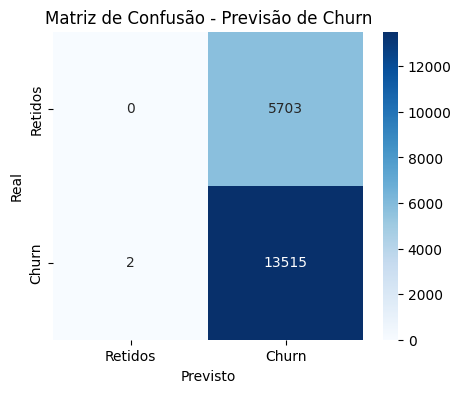

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar os dados do Olist
orders = pd.read_csv("olist_data/olist_orders_dataset.csv")
customers = pd.read_csv("olist_data/olist_customers_dataset.csv")
order_items = pd.read_csv("olist_data/olist_order_items_dataset.csv")
payments = pd.read_csv("olist_data/olist_order_payments_dataset.csv")

# Mesclar os datasets para obter um conjunto de dados consolidado
df = orders.merge(customers, on="customer_id", how="inner")
df = df.merge(order_items, on="order_id", how="left")
df = df.merge(payments, on="order_id", how="left")

# Converter a coluna de data para formato datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Criar a variável-alvo (Churn)
# Consideramos churn como clientes que NÃO compraram nos últimos 6 meses do dataset
última_compra = df.groupby("customer_unique_id")["order_purchase_timestamp"].max()
df["last_purchase"] = df["customer_unique_id"].map(última_compra)
data_limite = df["order_purchase_timestamp"].max() - pd.DateOffset(months=6)
df["churn"] = (df["last_purchase"] < data_limite).astype(int)  # 1 = Churn, 0 = Retido

# Selecionar as features (variáveis preditoras)
df_model = df.groupby("customer_unique_id").agg(
    total_orders=("order_id", "count"),
    avg_payment_value=("payment_value", "mean"),
    max_payment_value=("payment_value", "max"),
    min_payment_value=("payment_value", "min"),
    std_payment_value=("payment_value", "std"),
    churn=("churn", "max")  # Variável-alvo
).fillna(0)  # Preencher valores nulos

# Separar variáveis preditoras (X) e alvo (y)
X = df_model.drop(columns=["churn"])  # Variáveis independentes
y = df_model["churn"]  # Variável dependente (0 ou 1)

# Normalizar os dados (escala padrão)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Criar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retidos', 'Churn'], yticklabels=['Retidos', 'Churn'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Previsão de Churn")
plt.show()

O modelo de regressão logística apresentou sérios problemas de desbalanceamento, resultando em uma previsão onde todos os clientes foram classificados como churn, sem identificar corretamente nenhum cliente retido. Esse comportamento compromete a eficácia do modelo, pois um bom preditor deve ser capaz de diferenciar ambos os grupos.

Além disso, ao analisar o perfil de recorrência dos clientes, observa-se que 96,88% dos clientes são únicos, ou seja, realizaram apenas uma compra, representando o cenário A. Já o cenário B, que corresponderia aos clientes retidos, não possui exemplos suficientes para que o modelo aprenda a diferenciá-los corretamente.

Na tentativa de mitigar o desbalanceamento e melhorar a performance do modelo, testou-se o algoritmo Random Forest. No entanto, a base de dados revelou-se insuficiente para realizar previsões confiáveis, reforçando a necessidade de maiores informações sobre o cliente, além da sua geolocalização, para um treinamento adequado do modelo.